<a href="https://colab.research.google.com/github/OrJaku/road-sign-recognition/blob/master/road_sign_rec_model_binary_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import os, shutil, cv2, json
import pandas as pd
import numpy as np
from keras import layers, models, optimizers, metrics
from keras.preprocessing.image import ImageDataGenerator
import matplotlib
import time
matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

In [9]:
cd "/content"

/content


In [10]:
try:
  os.mkdir("data")
except FileExistsError:
  pass
!cp "/content/drive/My Drive/Colab Notebooks/Road_sign_rec/Temp/Dataset_full_pic_zip.zip" "/content/data/Dataset_full_pic_zip.zip"

In [11]:
cd data

/content/data


In [12]:
!unzip -q Dataset_full_pic_zip

replace Data/train_data/nosing/mzhESn4L1oRLBMrOL7m2Lw.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [15]:
# data_folder = "/content/data/Data"
base_dir = "Data/"

train_dir = os.path.join(base_dir, 'train_data')
try:
  os.mkdir(train_dir)
except FileExistsError:
  pass

test_dir = os.path.join(base_dir, 'test_data')
try:
  os.mkdir(test_dir)
except FileExistsError:
  pass

valid_dir = os.path.join(base_dir, 'valid_data')
try:
  os.mkdir(valid_dir)
except FileExistsError:
  pass

In [22]:
batch_size = 1
picture_width = 800
picture_height = 600
class_mode = "categorical"

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=10,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.3,
                                  horizontal_flip=False,
                                  vertical_flip=False,                                   
                                  fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (picture_height,picture_width),
    batch_size = batch_size,
    class_mode = class_mode
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (picture_height,picture_width),
    batch_size = batch_size,
    class_mode = class_mode
)

number_of_classes = len(train_generator.class_indices)

Found 1860 images belonging to 2 classes.
Found 931 images belonging to 2 classes.


In [30]:
INIT_LR = 1e-3
epochs = 10
opt = optimizers.Adam(lr=INIT_LR, decay=INIT_LR / epochs)
metrics = 'accuracy'
activation = 'sigmoid'
loss = 'binary_crossentropy'

In [31]:
dropout_1 = 0.3
dropout_2 = 0.3
dropout_3 = 0.3
dropout_4 = 0.3
dropout_5 = 0.3
dropout_6 = 0.2
dropout_7 = 0.2
dropout_8 = 0.2

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(picture_height, picture_width, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(dropout_1))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(dropout_2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(dropout_3))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(dropout_4))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(dropout_5))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(dropout_6))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.Dropout(dropout_7))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(dropout_8))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(dropout_6))
model.add(layers.Dense(number_of_classes))
model.add(layers.Activation(activation))

model.compile(
    loss=loss,
    optimizer=opt,
    metrics=[metrics]
    )
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 598, 798, 32)      896       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 299, 399, 32)      0         
_________________________________________________________________
dropout_50 (Dropout)         (None, 299, 399, 32)      0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 297, 397, 64)      18496     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 148, 198, 64)      0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 148, 198, 64)      0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 146, 196, 64)     

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=50
)

time_stemp = time.strftime("%d%m%Y%H%M%S")
model_name = f'model_signs_binary_{activation}_{time_stemp}.h5'
path_to_save = "/content/drive/My Drive/Colab Notebooks/Road_sign_rec"
model_path = os.path.join(path_to_save, model_name)
model.save(model_path)
print(f"Saved model as {model_name}")

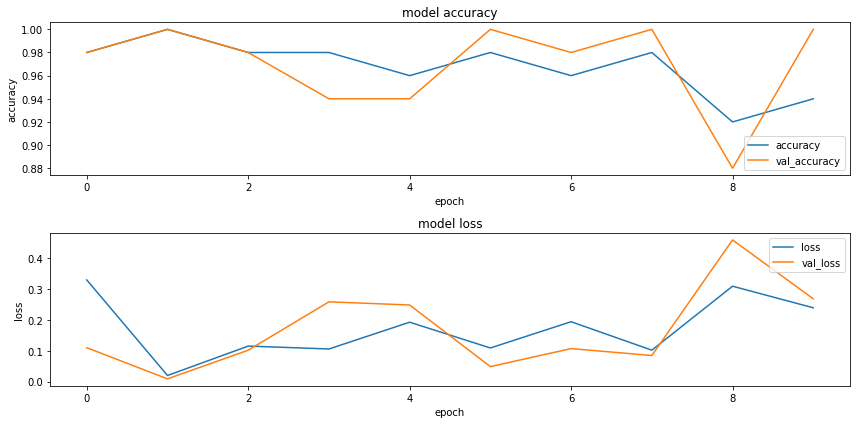

In [35]:
fig = plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig